# Part II - Ford GoBike System Data
## by Victor Obi

## Investigation Overview

>Trip count is highest on thursdays with tuesday and wednesday in close second and third respectively. Analysis shows a sharp peak in trip duration after midnight. In otherwords users log in more trip time between 2am and 4am. Customers of all gender logged in more trip time when compared to subscribers of all gender. Female customers logged in more trip time compared to male customers.

## Dataset Overview

> The dataset explores data obtained from the Ford GoBike system data. It contains 183412 rows and 16 columns and shed light on the bikeshare habits of users around greater San Francisco Bay area between feb 2019 and and march 2019. The dataset presented with some data quality issues such as - Start_time and end_time are listed as object datatype duration_sec is measured in seconds user_type, member_gender, bike_share_for_all_trip are listed as object datatype bike_id, start_station_id and end_station_id are listed float and int datatype Age column is missing The above issues were resolved resulting in a dataset fit for exploration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
# Creating a copy of the dataset 
df1=df.copy()
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# Changing start-time and end-time to datetime datatype
df1['start_time'] = pd.to_datetime(df1['start_time'])
df1['end_time'] = pd.to_datetime(df1['end_time'])
# confirming
df1['start_time'].dtype, df1['end_time'].dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [6]:
# convert duration_sec to duration_mins
df1['duration_mins'] = (df1['duration_sec']) / 60
# confirming
df1.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_mins
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.75


In [7]:
# Converting user_type, member_gender and bike_share_for_all_trip to cat datatype
df1['user_type'] = df1['user_type'].astype('category')
df1['member_gender'] = df1['member_gender'].astype('category')
df1['bike_share_for_all_trip'] = df1['bike_share_for_all_trip'].astype('category')
# confirming
df1['user_type'].dtype, df1['member_gender'].dtype, df1['bike_share_for_all_trip'].dtype

(CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=False),
 CategoricalDtype(categories=['Female', 'Male', 'Other'], ordered=False),
 CategoricalDtype(categories=['No', 'Yes'], ordered=False))

In [8]:
# Converting bike_id, start_station_id and end_station_id to object
df1['bike_id'] = df1['bike_id'].astype(str)
df1['start_station_id'] = df1['start_station_id'].astype(str)
df1['end_station_id'] = df1['end_station_id'].astype(str)
#confirming
df1['bike_id'].dtype, df1['start_station_id'].dtype, df1['end_station_id'].dtype


(dtype('O'), dtype('O'), dtype('O'))

In [9]:
# Creating new column for member_age
df1['member_age'] = 2019 - df1['member_birth_year']
# subsetting for users 64 and below
df1 = df1.query('member_age <= 64')
#confirming result
df1['member_age'].max()

64.0

In [10]:
# drop columns not required for analysis
df1.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1,  inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Trip Distribution by Day of the Week

> The figure below shows a plot of Trip count by day of the week. Trip count is highest on thursdays with tuesday and wednesday in close second and third respectively. In otherwords, more users are keen to use the bike share services on the aforementioned days. Making more bikes available and ensuring they are properly charged on these days may encourage user satisfaction and by extension revenue.


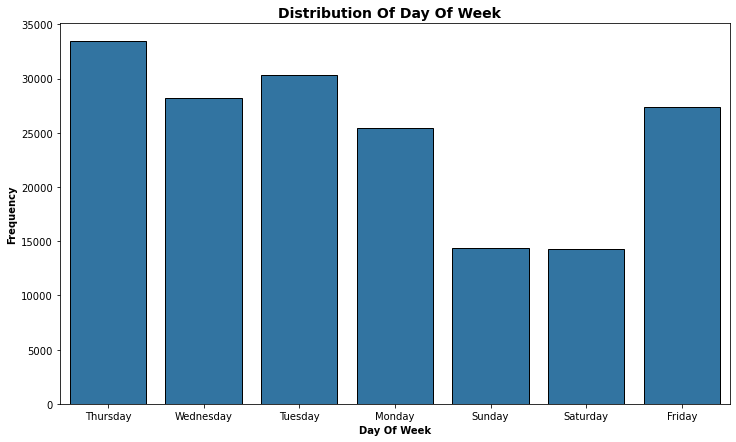

In [12]:
#creating a function for countplot
def mycountplot(df, xVar, hueVar=None,color=0,palette=None,order=None):
    '''
    inputs:categorical variable
    outputs:countplot
    
    '''
    
    #set plot dimensions
    plt.figure(figsize=(12,7))
    # plot
    sb.countplot(data=df1, x=xVar, hue=hueVar, color=sb.color_palette()[color],palette=palette,order=order,edgecolor='black')
    xVar=xVar.replace("_"," ") # replace _ with a space
    if hueVar:
        hueVar=hueVar.replace("_", " ")
    # Add title and format it
    plt.title(f'''Distribution of {xVar} {'by' if hueVar else ''} {hueVar if hueVar else ''}'''.title(), fontsize = 14, weight = "bold")
    # Add x label and format it
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')
    # Add y label and format it
    plt.ylabel('Frequency'.title(), fontsize = 10, weight = 'bold')

# Creating a new column day_of_week
df1['day_of_week'] = df1['start_time'].dt.day_name()    
# call plot function
mycountplot(df1,'day_of_week')

## Hourly Mean of Trip Duration(mins)

> The figure below shows a breakdown of hourly trip duration. Analysis shows a sharp peak in trip duration after midnight. In otherwords users log in more trip time between 2am and 4am. This is followed by a sharp drop which remains stable till 10pm.

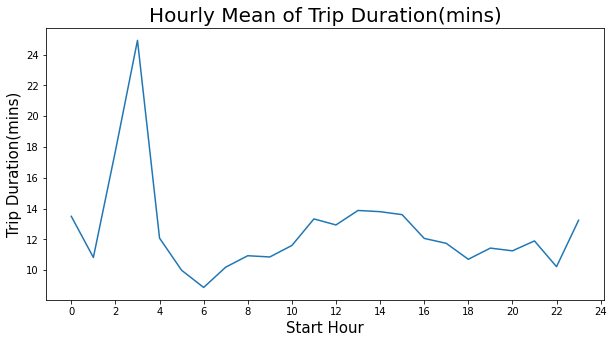

In [13]:
df1.groupby(df1['start_time'].dt.hour)['duration_mins'].mean().plot(kind='line', figsize=(10,5))
plt.xticks([x for x in range(0,25,2)])
plt.xlabel('Start Hour', fontsize=15)
plt.ylabel('Trip Duration(mins)', fontsize=15);
plt.title('Hourly Mean of Trip Duration(mins)', fontsize=20);

## Plot of Trip Duration by User Type and Gender

> A plot of trip duration by user type and gender shows that customers of all gender logged in more trip time when compared to subscribers of all gender. Female customers logged in more trip time compared to male customers. This is interesting because 74.5% of users are male compared to 23.4% of females.


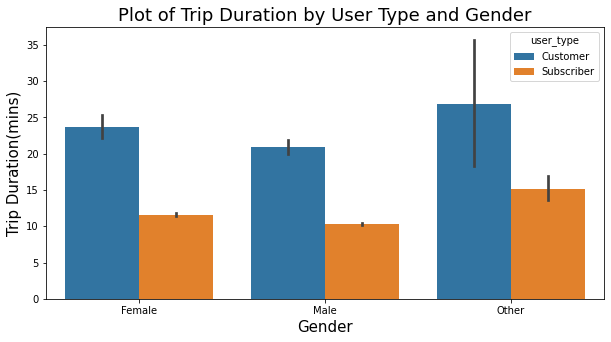

In [14]:
plt.figure(figsize=(10,5))
sb.barplot(data=df1, x='member_gender', y='duration_mins', hue='user_type')
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Trip Duration(mins)', fontsize=15)
plt.title('Plot of Trip Duration by User Type and Gender', fontsize=18);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
